# KMeans Clustering Algorithm

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Documents/income.csv")

In [4]:
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


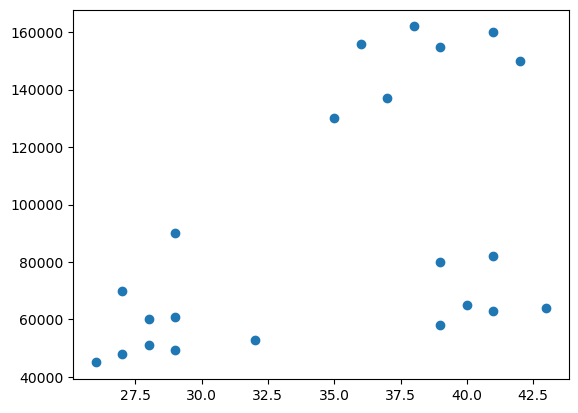

In [5]:
plt.scatter(df.Age,df["Income($)"])

In [6]:
km = KMeans( n_clusters=3 ,max_iter = 1000, n_init=10 )
km

KMeans(max_iter=1000, n_clusters=3, n_init=10)

In [7]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
df['cluster'] = y_predicted
df['cluster']

0     2
1     2
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    2
20    2
21    0
Name: cluster, dtype: int32

In [9]:
df.head(4)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0


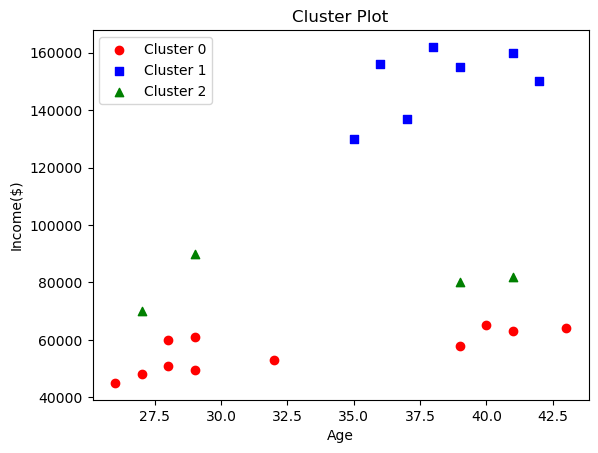

In [10]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red', marker='o', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', marker='s', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='green', marker='^', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Cluster Plot')
plt.legend()
plt.show()

# scaling is not proper so above error occured large difference between x axis and y axis 20000 and 3

In [11]:
##Use MinMax Scaler for scaling

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

# use kmeans again to train dataset , after scaling                                             

In [12]:
km = KMeans( n_clusters=3 ,max_iter = 1000, n_init=10 )
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['sacled_cluster'] = y_predicted
df

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster,sacled_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


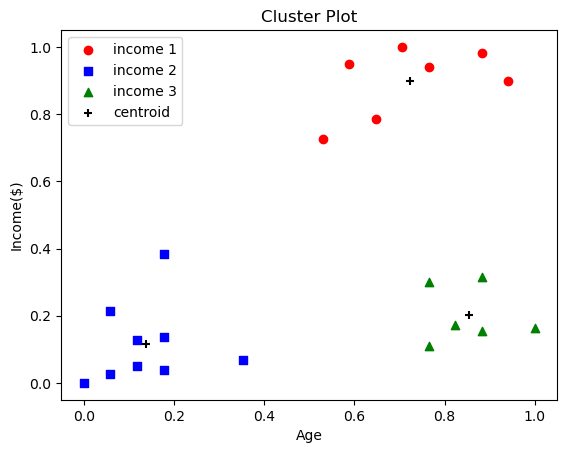

In [13]:
df1 = df[df.sacled_cluster == 0]
df2 = df[df.sacled_cluster == 1]
df3 = df[df.sacled_cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red', marker='o', label='income 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', marker='s', label='income 2')
plt.scatter(df3['Age'], df3['Income($)'], color='green', marker='^', label='income 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1] , color='black' , marker='+' , label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Cluster Plot')
plt.legend()
plt.show()

# centroids of each cluster

In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

## Elbow plot method - used to find best K value

### intially we need to assume a range of k value and sse[sum of square error]
#### parameter ( inertia_ provide sse )

In [19]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans( n_clusters = k )
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [20]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21878010893330446,
 0.18185811965571239,
 0.14090581089405507,
 0.10188787724979426]

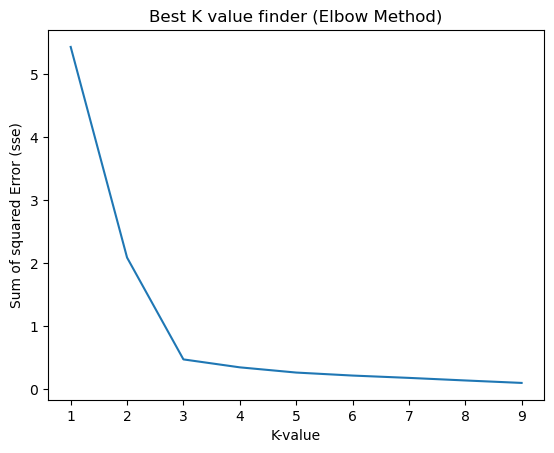

In [21]:
plt.xlabel('K-value')
plt.ylabel('Sum of squared Error (sse)')
plt.title('Best K value finder (Elbow Method)')
plt.plot(k_range,sse)

# so from abow graph best k value or cluster amount is 3 for this clustering